# Alphavirus RdRp conservation Analysis

### Sequences retrived using PsiBlast

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import Entrez, SeqIO, AlignIO

#import sys
#sys.path.append('MyModules/')
#from retrieve_ProtSeq import retrive_protSEQ_from_accesionIDS

pd.set_option('display.max_columns', 110)

## Shannon Entropy

Entropy measures the amount of information or uncertainty in the column. Lower entropy indicates more order or less randomness (high conservation), and higher entropy suggests more disorder or greater randomness (less conservation).

The formula for Shannon entropy is given by:

$$
H = -\sum_{i=1}^{n} p_i \log_2 p_i
$$

Where:
- \( H \) is the Shannon entropy,
- \( p_i \) represents the probability of each unique character occurring at a position in the sequence,
- The sum is taken over all unique characters.

## Effective Number (N<sub>eff</sub>)

Given the entropy \(H\) in natural log at different positions in a alignment, the effective number (Neff) can be calculated using the following formula:
Neff represents the "effective diversity" or "effective redundancy" in a aligment column. In the context of th 20 natural amino acid, neff of 1, mean the column is complety conserved, where we have just o amino acid across the position aligned. A neff of 20, means complete random, where all 20 amino acids where  found, in equally porpotion.


#### Effective Number Calculation N<sub>eff</sub>

The effective number N<sub>eff</sub> for each position, derived from the entropy, is given by:

$$
N_{eff} = e^H
$$



In [2]:
def calculate_entropy(column):
    """Calculate the Shannon entropy of a column in the alignment."""
    column_list = [x for x in column if x != '-'] # Remove gaps, if they exist
    
    unique, counts = np.unique(column_list, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log(probabilities)) # - ensure that after summation of each AA entropy the result is positive. I can use log2 to make the results in bits, as the weblog
    return entropy


def neff(entropies):
    #neff = [np.exp(H) for H in entropies]
    neff = np.exp(entropies)
    return neff

## Colecting the data

In [3]:
data = pd.read_excel('data/VMR_MSL38_v2_ICTV.xlsx')
data = data.query('Genus=="Alphavirus"')
print(data.shape)
data.head()

(54, 26)


,Sort,Isolate Sort,Realm,Subrealm,Kingdom,Subkingdom,Phylum,Subphylum,Class,Subclass,Order,Suborder,Family,Subfamily,Genus,Subgenus,Species,Exemplar or additional isolate,Virus name(s),Virus name abbreviation(s),Virus isolate designation,Virus GENBANK accession,Virus REFSEQ accession,Genome coverage,Genome composition,Host source
6736,6737,1,Riboviria,NaN,Orthornavirae,NaN,Kitrinoviricota,NaN,Alsuviricetes,NaN,Martellivirales,NaN,Togaviridae,NaN,Alphavirus,NaN,Aura virus,E,Aura virus,AURAV,NaN,AF126284,NC_003900,Coding-complete genome,ssRNA(+),"invertebrates, vertebrates"
6737,6738,1,Riboviria,NaN,Orthornavirae,NaN,Kitrinoviricota,NaN,Alsuviricetes,NaN,Martellivirales,NaN,Togaviridae,NaN,Alphavirus,NaN,Barmah Forest virus,E,Barmah Forest virus,BFV,BH2193,U73745,NC_001786,Complete genome,ssRNA(+),"invertebrates, vertebrates"
6738,6739,1,Riboviria,NaN,Orthornavirae,NaN,Kitrinoviricota,NaN,Alsuviricetes,NaN,Martellivirales,NaN,Togaviridae,NaN,Alphavirus,NaN,Bebaru virus,E,bebaru virus,BEBV,NaN,HM147985,NC_016962,Complete genome,ssRNA(+),"invertebrates, vertebrates"
6739,6740,1,Riboviria,NaN,Orthornavirae,NaN,Kitrinoviricota,NaN,Alsuviricetes,NaN,Martellivirales,NaN,Togaviridae,NaN,Alphavirus,NaN,Caaingua virus,E,Caainguá virus,CAAV,MS681,MK353339,NC_055569,Complete genome,ssRNA(+),"invertebrates, vertebrates"
6740,6741,1,Riboviria,NaN,Orthornavirae,NaN,Kitrinoviricota,NaN,Alsuviricetes,NaN,Martellivirales,NaN,Togaviridae,NaN,Alphavirus,NaN,Cabassou virus,E,Cabassou virus; Venezuelan equine encephalitis...,CABV; VEEV-V,CaAr 508,AF075259,NC_038670,Complete genome,ssRNA(+),"invertebrates, vertebrates"


In [ ]:
#ids = list(data['Virus GENBANK accession'].values)


# filename = f"data/alphavirus_proteins_annotation.txt"
# os.system(f"rm {filename}")

# with open(filename, "a") as file:
#     file.write(f"AccessionNumber\tProteinID\tProteinName\tOrganism\tDescription\tSequence\n")
#     for accession_number in ids:
#         print(f"Downloading {accession_number}")
#         handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="gb", retmode="text", email="luiz.vieira@utexas.edu")
#         record = SeqIO.read(handle, "genbank")
#         for feature in record.features:
#             if feature.type == "CDS":
#                     protein_id = None
#                     protein_name = None
#                     description = None
#                     organism = None
#                     protein_sequence = None
                    
#                     try:
#                         protein_id = feature.qualifiers.get("protein_id")[0]
#                         protein_name =  feature.qualifiers.get('product')[0]
#                         organism = record.annotations.get("organism", '')
#                         protein_sequence = feature.qualifiers.get("translation")[0]
#                         if feature.qualifiers.get('note'):
#                             description = feature.qualifiers.get('note')[0]
#                     except TypeError:
#                         continue
                  

#                     file.write(f"{accession_number}\t{protein_id}\t{protein_name}\t{organism}\t{description}\t{protein_sequence}\n")

## Filtering for nsPs

In [4]:
filename = f"data/alphavirus_proteins_annotation.txt"
meta_data = pd.read_csv(filename, sep='\t')

nsp_list=[
    'nonstructural polyprotein', 'non structural polyprotein',
    'non-structural polyprotein', 'nsP1234 polyprotein', 'nsp1234', 'polyprotein 2',
    'non-structural polyprotein precursor P1234',  'nonstructural polyprotein nsP1-nsP2-nsP3-nsP4',
    'polyprotein of non-structural proteins', 'putative nonstructural polyprotein precursor']

nsp = meta_data[meta_data['ProteinName'].isin(nsp_list)]
print(nsp.shape)
nsp.head()

(48, 6)


,AccessionNumber,ProteinID,ProteinName,Organism,Description,Sequence
1,AF126284,AAD13623.1,polyprotein 2,Aura virus,NaN,MNSVFYNPFGRGAYAQPPIAWRPRRRAAPAPRPSGLTTQIQQLTRA...
2,U73745,AAB40701.1,nonstructural polyprotein,Barmah Forest virus,NaN,MAKPVVKIDVEPESHFAKQVQSCFPQFEIEAVQTTPNDHAHARAFS...
4,HM147985,AEJ36224.1,non structural polyprotein,Bebaru virus,NaN,MNKVHVDIDEESPFLKSLQRAFPSLEIEAKQVTANDHACARAFSHL...
6,MK353339,QBM15857.1,nonstructural polyprotein,Caaingua virus,NaN,MEKVKVHVDLDPEDRYVAELQRCFPNFEIEAKQTSPNDHARARAFS...
8,AF075259,AAD14566.1,nonstructural polyprotein,Cabassou virus,"possible incorporation of arginine, cysteine, ...",MEKVHVDIEEDSPFLRALQRSFPQFEVEAKQVTDNDHANARAFSHL...


In [5]:
# with open('data/alphavirus/alphavirus_non_structural_proteins.fasta', 'w') as file:
#     for index, row in nsp.iterrows():
#         file.write(f">{row['ProteinID']} | {row['ProteinName']} | {row['Organism']}\n")
#         file.write(f"{row['Sequence']}\n")

In [ ]:
#mafft --auto data/alphavirus/alphavirus_non_structural_proteins.fasta > data/alphavirus/alphavirus_non_structural_proteins_aligned.fasta

In [5]:
# those sequences do not have nsp4, so they were removed from the alignment
seqs_no_nsp4 = ['AAD13623.1','AEJ36223.1','AAM10629.1','AEJ36224.1','AAC19326.1','AEJ36226.1','AEJ36232.1','AAC19323.2','AEQ61910.1','AEJ36230.1','AEJ36234.1','AEJ36238.1','AAB40701.1','AEJ36236.1']

nsp_with_nsp4 = nsp[~nsp['ProteinID'].isin(seqs_no_nsp4)]
nsp_with_nsp4.head()

,AccessionNumber,ProteinID,ProteinName,Organism,Description,Sequence
6,MK353339,QBM15857.1,nonstructural polyprotein,Caaingua virus,NaN,MEKVKVHVDLDPEDRYVAELQRCFPNFEIEAKQTSPNDHARARAFS...
8,AF075259,AAD14566.1,nonstructural polyprotein,Cabassou virus,"possible incorporation of arginine, cysteine, ...",MEKVHVDIEEDSPFLRALQRSFPQFEVEAKQVTDNDHANARAFSHL...
10,AF369024,AAN05101.1,nonstructural polyprotein,Chikungunya virus,"contains nsp1, nsp2, nsp3, and nsp4 proteins",MDPVYVDIDADSAFLKALQRAYPMFEVEPRQVTPNDHANARAFSHL...
12,KP003813,AJD20059.2,non-structural polyprotein,Chikungunya virus,NaN,MDPVYVDIDADSAFLKALQRAYPMFEVESRQVTPNDHANARAFSHL...
17,AF075251,AAD14550.1,nonstructural polyprotein,Everglades virus,"possible incorporation of arginine, cysteine, ...",MEKVHVDIEEDSPFLRALQRSFPQFEVEAKQVTDNDHANARAFSHL...


In [21]:
# with open('data/alphavirus/alphavirus_nsP_contains_nsp4.fasta', 'w') as file:
#     for index, row in nsp_with_nsp4.iterrows():
#         file.write(f">{row['ProteinID']} | {row['ProteinName']} | {row['Organism']}\n")
#         file.write(f"{row['Sequence']}\n")

In [ ]:
#mafft --auto data/alphavirus/alphavirus_nsP_contains_nsp4.fasta > data/alphavirus/alphavirus_non_structural_proteins_contains_nsp4_aligned.fasta

In [ ]:
seqs = [
    'QBM15857.1','AAD14558.1','AAD14554.1','AAD14566.1','ABP73665.1','AIM46755.1','AAD14560.1','AAB04682.2','ACT68008.1',
    'ACO59901.1','AAD14550.1','AAF28339.1','CAA27741.1','AHL83800.1','AAL79763.1','ABL84688.1','AAD14564.1','AAK66989.1',
    'ACT75287.1','AAC83378.1','AAD14556.1','AAD14562.1','AAU85259.1','ABK32031.1','AAA96972.1','ACV66991.1','AAA96329.1',
    'AAC97204.1','AAC97206.1','AAN05101.1','AJD20059.2']

In [4]:
# removing those putative sequences
for seq in SeqIO.parse('data/alphavirus/alphavirus_non_structural_proteins_contains_nsp4.fasta', 'fasta'):
    if seq.id not in seqs:
        print(seq.id)


CAC87660.1
AAC19321.2
AAC19324.1


In [ ]:
#mafft --auto data/alphavirus/alphavirus_nsP_contains_nsp4_filtered.fasta > data/alphavirus/alphavirus_nsP_contains_nsp4_filtered_aligned.fasta

## PSI-Blast alphavirus nsP4 ref sequences agaisnt URVDBv26_prot_rmdup2
In this version of the virus database I removed all the duplicated sequences.

In [ ]:
#psiblast -query data/nsP4/alphavirus_nsP4_refseqs.fasta -db ../RVDB/blastDB/URVDBv26_prot_rmdup2/URVDB -out results/res_psiblast_nsP4_refs_rvdb_rmdup2.txt -outfmt 6 -num_iterations 3 -num_threads 32 -max_target_seqs 100000

In [6]:
res = pd.read_table('results/res_psiblast_nsP4_refs_rvdb_rmdup2.txt', header=None)

header = ["QueryID", "SubjectID", "Identity(%)", "Length", "Mismatch", "GapOpen", "QueryStart", "QueryEnd", "SubjectStart", "SubjectEnd", "E-value", "BitScore"]
res.columns = header

res.sort_values(by='Identity(%)', ascending=False, inplace=True)

res.query('`Identity(%)` > 30')

,QueryID,SubjectID,Identity(%),Length,Mismatch,GapOpen,QueryStart,QueryEnd,SubjectStart,SubjectEnd,E-value,BitScore
0,QBM15857.1,acc|REFSEQ|YP_010087634.1|REFSEQ|NC_055569|non...,100.000,608,0,0,1,608,2029,2636,0.000000e+00,1280.0
7149,QBM15857.1,acc|REFSEQ|YP_010087634.1|REFSEQ|NC_055569|non...,100.000,608,0,0,1,608,2029,2636,0.000000e+00,739.0
995061,AAA96972.1,acc|GENBANK|UCR75747.1|GENBANK|MZ508484|nonstr...,100.000,115,0,0,161,275,1,115,3.620000e-33,130.0
1044386,AAN05101.1,acc|REFSEQ|NP_690588.1|REFSEQ|NC_004162|nonstr...,100.000,611,0,0,1,611,1864,2474,6.400000e-152,492.0
994974,AAA96972.1,acc|GENBANK|ACA66005.1|GENBANK|EU498002|NSP4,100.000,141,0,0,284,424,1,141,1.510000e-41,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...
720441,CAA27741.1,acc|GENBANK|ABP49568.1|GENBANK|EF508151|RNA-de...,30.055,183,96,8,369,539,71,233,1.400000e-02,47.4
985769,AAA96972.1,acc|GENBANK|QDJ95879.1|NEIGHBOR|MN080499|RNA-d...,30.047,213,135,6,366,574,225,427,2.440000e-11,75.1
985768,AAA96972.1,acc|GENBANK|QZL11031.1|NEIGHBOR|MZ020960|186,30.047,213,135,6,366,574,1408,1610,2.390000e-11,76.6
269546,AAD14554.1,acc|GENBANK|QOK36431.1|NEIGHBOR|MT809205|RdRp,30.038,263,160,8,282,535,103,350,1.820000e-12,79.0


In [7]:
# cover 95% of the query sequence
s = 611 * 0.95
res['coverage'] = res['QueryEnd'] - res['QueryStart']
res = res.query(f'coverage > {s} and `Identity(%)` > 30')
res.drop_duplicates(subset='SubjectID')

,QueryID,SubjectID,Identity(%),Length,Mismatch,GapOpen,QueryStart,QueryEnd,SubjectStart,SubjectEnd,E-value,BitScore,coverage
0,QBM15857.1,acc|REFSEQ|YP_010087634.1|REFSEQ|NC_055569|non...,100.000,608,0,0,1,608,2029,2636,0.000000e+00,1280.0,607
1044386,AAN05101.1,acc|REFSEQ|NP_690588.1|REFSEQ|NC_004162|nonstr...,100.000,611,0,0,1,611,1864,2474,6.400000e-152,492.0,610
865757,ACV66991.1,acc|GENBANK|QFR08149.1|GENBANK|MN038243|non-st...,100.000,611,0,0,1,611,1863,2473,0.000000e+00,1275.0,610
865754,ACV66991.1,acc|GENBANK|ACV66991.1|NEIGHBOR|GQ433354|non-s...,100.000,611,0,0,1,611,1883,2493,0.000000e+00,1276.0,610
865753,ACV66991.1,acc|GENBANK|QFR08147.1|GENBANK|MN038242|non-st...,100.000,611,0,0,1,611,1883,2493,0.000000e+00,1276.0,610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992024,AAA96972.1,acc|GENBANK|QZA74868.1|GENBANK|MZ395645|non-st...,56.908,608,260,2,1,606,1966,2573,8.800000e-176,560.0,605
1007823,AAA96972.1,acc|REFSEQ|NP_598184.1|REFSEQ|NC_003433|Nonstr...,56.743,608,261,2,1,606,1985,2592,6.070000e-100,343.0,605
992034,AAA96972.1,acc|REFSEQ|NP_647496.1|REFSEQ|NC_003930|non-st...,56.579,608,262,2,1,606,1993,2600,3.750000e-175,558.0,605
985010,AAA96972.1,acc|GENBANK|UIE35674.1|GENBANK|OL754560|non-st...,55.428,608,269,2,1,606,1955,2562,0.000000e+00,676.0,605


In [8]:
# remove duplicates
res = res.drop_duplicates(subset='SubjectID')
res

,QueryID,SubjectID,Identity(%),Length,Mismatch,GapOpen,QueryStart,QueryEnd,SubjectStart,SubjectEnd,E-value,BitScore,coverage
0,QBM15857.1,acc|REFSEQ|YP_010087634.1|REFSEQ|NC_055569|non...,100.000,608,0,0,1,608,2029,2636,0.000000e+00,1280.0,607
1044386,AAN05101.1,acc|REFSEQ|NP_690588.1|REFSEQ|NC_004162|nonstr...,100.000,611,0,0,1,611,1864,2474,6.400000e-152,492.0,610
865757,ACV66991.1,acc|GENBANK|QFR08149.1|GENBANK|MN038243|non-st...,100.000,611,0,0,1,611,1863,2473,0.000000e+00,1275.0,610
865754,ACV66991.1,acc|GENBANK|ACV66991.1|NEIGHBOR|GQ433354|non-s...,100.000,611,0,0,1,611,1883,2493,0.000000e+00,1276.0,610
865753,ACV66991.1,acc|GENBANK|QFR08147.1|GENBANK|MN038242|non-st...,100.000,611,0,0,1,611,1883,2493,0.000000e+00,1276.0,610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992024,AAA96972.1,acc|GENBANK|QZA74868.1|GENBANK|MZ395645|non-st...,56.908,608,260,2,1,606,1966,2573,8.800000e-176,560.0,605
1007823,AAA96972.1,acc|REFSEQ|NP_598184.1|REFSEQ|NC_003433|Nonstr...,56.743,608,261,2,1,606,1985,2592,6.070000e-100,343.0,605
992034,AAA96972.1,acc|REFSEQ|NP_647496.1|REFSEQ|NC_003930|non-st...,56.579,608,262,2,1,606,1993,2600,3.750000e-175,558.0,605
985010,AAA96972.1,acc|GENBANK|UIE35674.1|GENBANK|OL754560|non-st...,55.428,608,269,2,1,606,1955,2562,0.000000e+00,676.0,605


In [9]:
# save the sequences from the fasta file
# with open('data/nsP4/psiblast_data/res_nsp4_query_rvdb_rmdup2_seq_idt30.fasta', 'w') as file:
#     for seq in SeqIO.parse('../RVDB/U-RVDB/U-RVDBv26.0-prot_rmdup2.fasta', 'fasta'):
#         if seq.id in res['SubjectID'].values:
#             file.write(f">{seq.id}\n")
#             file.write(f"{seq.seq}\n")

## Merge files sequences with metadata

In [9]:
records = SeqIO.parse('data/nsP4/psiblast_data/res_nsp4_query_rvdb_rmdup2_seq_idt30.fasta', 'fasta')

fasta_data = {"ID":[], "Sequence":[]}

for record in records:
    fasta_data["ID"].append(record.id)
    fasta_data["Sequence"].append(str(record.seq))

fasta_df = pd.DataFrame(fasta_data)
fasta_df.head()

,ID,Sequence
0,acc|GENBANK|QEV83785.1|GENBANK|MK959114|non-st...,MEKQVVNVDVDSQSPFVQQLQKCFPQFEIVAKQATPNDHANARAFS...
1,acc|GENBANK|QEV83787.1|GENBANK|MK959115|non-st...,MEKQVVNVDVDSQSPFVQQLQKCFPQFEIVAKQATPNDHANARAFS...
2,acc|GENBANK|QKV50500.1|NEIGHBOR|MK993756|non-s...,MDPVYVDIDADSAFLKALQRAYPMFEVEPRQVTPNDHANARAFSHL...
3,acc|GENBANK|ABP88821.1|NEIGHBOR|EF210157|nonst...,MDPVYVDIDADSAFLKALQRAYPMFEVEPRQVTPNDHANARAFSHL...
4,acc|GENBANK|ANH58366.1|NEIGHBOR|KU355832|nonst...,DHANARAFSHLAIKLIEQEIDPDSTILDIGSAPARRMMSDRKYHCV...


In [10]:
df = res.merge(fasta_df, left_on='SubjectID', right_on='ID')
df

,QueryID,SubjectID,Identity(%),Length,Mismatch,GapOpen,QueryStart,QueryEnd,SubjectStart,SubjectEnd,E-value,BitScore,coverage,ID,Sequence
0,QBM15857.1,acc|REFSEQ|YP_010087634.1|REFSEQ|NC_055569|non...,100.000,608,0,0,1,608,2029,2636,0.000000e+00,1280.0,607,acc|REFSEQ|YP_010087634.1|REFSEQ|NC_055569|non...,MEKVKVHVDLDPEDRYVAELQRCFPNFEIEAKQTSPNDHARARAFS...
1,AAN05101.1,acc|REFSEQ|NP_690588.1|REFSEQ|NC_004162|nonstr...,100.000,611,0,0,1,611,1864,2474,6.400000e-152,492.0,610,acc|REFSEQ|NP_690588.1|REFSEQ|NC_004162|nonstr...,MDPVYVDIDADSAFLKALQRAYPMFEVEPRQVTPNDHANARAFSHL...
2,ACV66991.1,acc|GENBANK|QFR08149.1|GENBANK|MN038243|non-st...,100.000,611,0,0,1,611,1863,2473,0.000000e+00,1275.0,610,acc|GENBANK|QFR08149.1|GENBANK|MN038243|non-st...,MKVTVDVEADSPFLKALQKAFPAFEVESQQVTPNDHANARAFSHLA...
3,ACV66991.1,acc|GENBANK|ACV66991.1|NEIGHBOR|GQ433354|non-s...,100.000,611,0,0,1,611,1883,2493,0.000000e+00,1276.0,610,acc|GENBANK|ACV66991.1|NEIGHBOR|GQ433354|non-s...,MKVTVDVEADSPFLKALQKAFPAFEVESQQVTPNDHANARAFSHLA...
4,ACV66991.1,acc|GENBANK|QFR08147.1|GENBANK|MN038242|non-st...,100.000,611,0,0,1,611,1883,2493,0.000000e+00,1276.0,610,acc|GENBANK|QFR08147.1|GENBANK|MN038242|non-st...,MKVTVDVEADSPFLKALQKAFPAFEVESQQVTPNDHANARAFSHLA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,AAA96972.1,acc|GENBANK|QZA74868.1|GENBANK|MZ395645|non-st...,56.908,608,260,2,1,606,1966,2573,8.800000e-176,560.0,605,acc|GENBANK|QZA74868.1|GENBANK|MZ395645|non-st...,QIKTAFPGFEVVASNRSSNDHAAARAFSHLATKWIERDIDGRQVIV...
1926,AAA96972.1,acc|REFSEQ|NP_598184.1|REFSEQ|NC_003433|Nonstr...,56.743,608,261,2,1,606,1985,2592,6.070000e-100,343.0,605,acc|REFSEQ|NP_598184.1|REFSEQ|NC_003433|Nonstr...,MMLNLTANPSAGTTVTVDLPADHPALNQFKTAFPGFEVVASNRSSN...
1927,AAA96972.1,acc|REFSEQ|NP_647496.1|REFSEQ|NC_003930|non-st...,56.579,608,262,2,1,606,1993,2600,3.750000e-175,558.0,605,acc|REFSEQ|NP_647496.1|REFSEQ|NC_003930|non-st...,MMQNLTANPSAGATVTVNLPADHPALNQFKTAFPGFEVVASNRSSN...
1928,AAA96972.1,acc|GENBANK|UIE35674.1|GENBANK|OL754560|non-st...,55.428,608,269,2,1,606,1955,2562,0.000000e+00,676.0,605,acc|GENBANK|UIE35674.1|GENBANK|OL754560|non-st...,TAFPGFEVVASNRSSNDHAAARAFSHLATKWIERDIDGRQVIVADI...


In [11]:
df[['BD1', 'ID1', 'BD2', 'ID2', 'ProtName']] = df['ID'].str.split('|', expand=True).drop(0, axis=1)
df.drop('ID', axis=1, inplace=True)
df

,QueryID,SubjectID,Identity(%),Length,Mismatch,GapOpen,QueryStart,QueryEnd,SubjectStart,SubjectEnd,E-value,BitScore,coverage,Sequence,BD1,ID1,BD2,ID2,ProtName
0,QBM15857.1,acc|REFSEQ|YP_010087634.1|REFSEQ|NC_055569|non...,100.000,608,0,0,1,608,2029,2636,0.000000e+00,1280.0,607,MEKVKVHVDLDPEDRYVAELQRCFPNFEIEAKQTSPNDHARARAFS...,REFSEQ,YP_010087634.1,REFSEQ,NC_055569,nonstructural
1,AAN05101.1,acc|REFSEQ|NP_690588.1|REFSEQ|NC_004162|nonstr...,100.000,611,0,0,1,611,1864,2474,6.400000e-152,492.0,610,MDPVYVDIDADSAFLKALQRAYPMFEVEPRQVTPNDHANARAFSHL...,REFSEQ,NP_690588.1,REFSEQ,NC_004162,nonstructural
2,ACV66991.1,acc|GENBANK|QFR08149.1|GENBANK|MN038243|non-st...,100.000,611,0,0,1,611,1863,2473,0.000000e+00,1275.0,610,MKVTVDVEADSPFLKALQKAFPAFEVESQQVTPNDHANARAFSHLA...,GENBANK,QFR08149.1,GENBANK,MN038243,non-structural
3,ACV66991.1,acc|GENBANK|ACV66991.1|NEIGHBOR|GQ433354|non-s...,100.000,611,0,0,1,611,1883,2493,0.000000e+00,1276.0,610,MKVTVDVEADSPFLKALQKAFPAFEVESQQVTPNDHANARAFSHLA...,GENBANK,ACV66991.1,NEIGHBOR,GQ433354,non-structural
4,ACV66991.1,acc|GENBANK|QFR08147.1|GENBANK|MN038242|non-st...,100.000,611,0,0,1,611,1883,2493,0.000000e+00,1276.0,610,MKVTVDVEADSPFLKALQKAFPAFEVESQQVTPNDHANARAFSHLA...,GENBANK,QFR08147.1,GENBANK,MN038242,non-structural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,AAA96972.1,acc|GENBANK|QZA74868.1|GENBANK|MZ395645|non-st...,56.908,608,260,2,1,606,1966,2573,8.800000e-176,560.0,605,QIKTAFPGFEVVASNRSSNDHAAARAFSHLATKWIERDIDGRQVIV...,GENBANK,QZA74868.1,GENBANK,MZ395645,non-structural
1926,AAA96972.1,acc|REFSEQ|NP_598184.1|REFSEQ|NC_003433|Nonstr...,56.743,608,261,2,1,606,1985,2592,6.070000e-100,343.0,605,MMLNLTANPSAGTTVTVDLPADHPALNQFKTAFPGFEVVASNRSSN...,REFSEQ,NP_598184.1,REFSEQ,NC_003433,Nonstructural
1927,AAA96972.1,acc|REFSEQ|NP_647496.1|REFSEQ|NC_003930|non-st...,56.579,608,262,2,1,606,1993,2600,3.750000e-175,558.0,605,MMQNLTANPSAGATVTVNLPADHPALNQFKTAFPGFEVVASNRSSN...,REFSEQ,NP_647496.1,REFSEQ,NC_003930,non-structural
1928,AAA96972.1,acc|GENBANK|UIE35674.1|GENBANK|OL754560|non-st...,55.428,608,269,2,1,606,1955,2562,0.000000e+00,676.0,605,TAFPGFEVVASNRSSNDHAAARAFSHLATKWIERDIDGRQVIVADI...,GENBANK,UIE35674.1,GENBANK,OL754560,non-structural


In [12]:
df['nsp4_seq'] = df.apply(lambda row: row['Sequence'][row['SubjectStart']-1:row['SubjectEnd']], axis=1)
df

,QueryID,SubjectID,Identity(%),Length,Mismatch,GapOpen,QueryStart,QueryEnd,SubjectStart,SubjectEnd,E-value,BitScore,coverage,Sequence,BD1,ID1,BD2,ID2,ProtName,nsp4_seq
0,QBM15857.1,acc|REFSEQ|YP_010087634.1|REFSEQ|NC_055569|non...,100.000,608,0,0,1,608,2029,2636,0.000000e+00,1280.0,607,MEKVKVHVDLDPEDRYVAELQRCFPNFEIEAKQTSPNDHARARAFS...,REFSEQ,YP_010087634.1,REFSEQ,NC_055569,nonstructural,YIFSSDTGPGHLQQQSVRQHDLPLPTWERKLPEIFHPPRFNAAKEE...
1,AAN05101.1,acc|REFSEQ|NP_690588.1|REFSEQ|NC_004162|nonstr...,100.000,611,0,0,1,611,1864,2474,6.400000e-152,492.0,610,MDPVYVDIDADSAFLKALQRAYPMFEVEPRQVTPNDHANARAFSHL...,REFSEQ,NP_690588.1,REFSEQ,NC_004162,nonstructural,YIFSSDTGPGHLQQKSVRQSVLPVNTLEEVHEEKCYPPKLDEAKEQ...
2,ACV66991.1,acc|GENBANK|QFR08149.1|GENBANK|MN038243|non-st...,100.000,611,0,0,1,611,1863,2473,0.000000e+00,1275.0,610,MKVTVDVEADSPFLKALQKAFPAFEVESQQVTPNDHANARAFSHLA...,GENBANK,QFR08149.1,GENBANK,MN038243,non-structural,YIFSSDTGPGHLQQKSVRQHALPCEMLYAHEEERTYPPALDEAREK...
3,ACV66991.1,acc|GENBANK|ACV66991.1|NEIGHBOR|GQ433354|non-s...,100.000,611,0,0,1,611,1883,2493,0.000000e+00,1276.0,610,MKVTVDVEADSPFLKALQKAFPAFEVESQQVTPNDHANARAFSHLA...,GENBANK,ACV66991.1,NEIGHBOR,GQ433354,non-structural,YIFSSDTGPGHLQQKSVRQHALPCEMLYAHEEERTYPPALDEAREK...
4,ACV66991.1,acc|GENBANK|QFR08147.1|GENBANK|MN038242|non-st...,100.000,611,0,0,1,611,1883,2493,0.000000e+00,1276.0,610,MKVTVDVEADSPFLKALQKAFPAFEVESQQVTPNDHANARAFSHLA...,GENBANK,QFR08147.1,GENBANK,MN038242,non-structural,YIFSSDTGPGHLQQKSVRQHALPCEMLYAHEEERTYPPALDEAREK...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,AAA96972.1,acc|GENBANK|QZA74868.1|GENBANK|MZ395645|non-st...,56.908,608,260,2,1,606,1966,2573,8.800000e-176,560.0,605,QIKTAFPGFEVVASNRSSNDHAAARAFSHLATKWIERDIDGRQVIV...,GENBANK,QZA74868.1,GENBANK,MZ395645,non-structural,YIFSSDQGTAHLSQHNTQTNNTTEVLMRTSVLPSNDHGTPDLPAET...
1926,AAA96972.1,acc|REFSEQ|NP_598184.1|REFSEQ|NC_003433|Nonstr...,56.743,608,261,2,1,606,1985,2592,6.070000e-100,343.0,605,MMLNLTANPSAGTTVTVDLPADHPALNQFKTAFPGFEVVASNRSSN...,REFSEQ,NP_598184.1,REFSEQ,NC_003433,Nonstructural,YIFSSDQGTAHLSQHNTQTNNTTEVLMRTSVLPSNDHGTPDLLAEM...
1927,AAA96972.1,acc|REFSEQ|NP_647496.1|REFSEQ|NC_003930|non-st...,56.579,608,262,2,1,606,1993,2600,3.750000e-175,558.0,605,MMQNLTANPSAGATVTVNLPADHPALNQFKTAFPGFEVVASNRSSN...,REFSEQ,NP_647496.1,REFSEQ,NC_003930,non-structural,YIFSSDQGTAHLSQHNTQTNNTTEVLMRTSVLPSNDHGTPDLPAET...
1928,AAA96972.1,acc|GENBANK|UIE35674.1|GENBANK|OL754560|non-st...,55.428,608,269,2,1,606,1955,2562,0.000000e+00,676.0,605,TAFPGFEVVASNRSSNDHAAARAFSHLATKWIERDIDGRQVIVADI...,GENBANK,UIE35674.1,GENBANK,OL754560,non-structural,YIFSSDQGTAHLSQHNTQTNNTTEVLMRTSVLPSNDHGTPDLPAET...


In [18]:
# with open('data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30.fasta', 'w') as file:
#     for idx, row, in df.iterrows():
#         file.write(f">{row['ID1']}\n")
#         file.write(f"{row['Sequence']}\n")

In [42]:
# seqs_res = []
# for record in SeqIO.parse('data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30_filteredX.fasta', 'fasta'):
#     seqs_res.append(str(record.seq))

# print(len(seqs_res))


# count = 0 
# with open('data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30_filteredX_ref.fasta', 'a') as file:
#     for record in SeqIO.parse('data/nsP4/alphavirus_nsP4_refseqs.fasta', 'fasta'):
#         if str(record.seq) not in seqs_res:
#             file.write(f">{record.id}\n")
#             file.write(f"{str(record.seq)}\n")
#             count += 1
# print(f"Number of sequences added: {count}")

Number of sequences added: 0


## Align sequences

In [ ]:
#mafft --auto data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30.fasta > data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30_aligned.fasta

In [29]:
# after trimming the alignment on the jawview, to only include nsp4, remove sequences with X
# count = 0
# with open('data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30_filteredX.fasta', 'w') as file:
#     for record in SeqIO.parse('data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30_filtered.fasta', 'fasta'):
#         if 'X' not in record.seq:
#             file.write(f">{record.id}\n")
#             file.write(f"{record.seq}\n")
#             count += 1
# print(f'{count} sequences without X')

1677 sequences without X


In [ ]:
#mafft --auto data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30_filteredX.fasta > data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30_filteredX_aligned.fasta

In [ ]:
## this will rename the ids of the sequences equal to the reference sequences

# mapping = {}
# for record in SeqIO.parse('data/nsP4/alphavirus_nsP4_refseqs.fasta', 'fasta'):
#     mapping[str(record.seq)] = record.id
# mapping

# # this will rename the ids of the sequences equal to the reference sequences
# with open('data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30_filteredX_ref.fasta', 'w') as file:
#     for record in SeqIO.parse('data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30_filteredX.fasta', 'fasta'):
#         if str(record.seq) in mapping and record.id != mapping[str(record.seq)]:
#             print(f"renaming {record.id} for the ref {mapping[str(record.seq)]}")
#             file.write(f">{mapping[str(record.seq)]}\n")
#             file.write(f"{record.seq}\n")
#         else:
#             file.write(f">{record.id}\n")
#             file.write(f"{record.seq}\n")

In [ ]:
#mafft --auto data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30_filteredX_ref.fasta > data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30_filteredX_ref_aligned.fasta

In [13]:
####################### those are only sequences from alphavirus ########################

seq_aligment = "data/nsP4/psiblast_data/alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30_filteredX_ref_aligned.fasta"

alignment = AlignIO.read(seq_aligment, "fasta")

# create a dictionary with the sequences, to create a data frame
dict_align = {} 
for record in alignment:
    # removing / added during alignment
    dict_align[record.id.split('/')[0]] = list(record.seq)
# create a data frame with the sequences aligned
nsp4_mtx_annot_sites = pd.DataFrame.from_dict(dict_align, orient='index')
nsp4_mtx_annot_sites

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,...,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617
QBM15857.1,Y,I,F,S,S,D,T,G,P,G,H,L,Q,Q,Q,S,V,R,Q,H,D,L,P,L,P,T,W,E,R,K,L,P,E,I,F,H,P,P,R,F,N,A,A,K,E,E,L,L,R,H,R,M,Q,M,A,...,V,G,I,R,E,Q,L,K,K,S,L,F,S,R,Y,G,V,Q,F,T,D,L,V,L,D,G,L,S,C,L,S,K,S,I,K,N,F,N,H,L,R,G,T,L,R,H,L,Y,V,-,-,-,-,-,-
ALI88667.1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,M,D,R,V,I,E,E,K,V,Y,P,P,R,L,D,E,A,K,E,K,Q,L,L,L,K,L,Q,M,H,...,S,G,L,G,S,E,I,E,V,A,L,A,S,R,Y,E,V,E,G,S,Y,N,L,L,L,A,M,S,T,F,A,H,S,M,K,N,F,S,A,L,R,G,P,V,I,H,L,Y,G,G,P,K,-,-,-
QGA70907.1,-,-,-,-,-,-,-,-,-,-,-,-,-,M,K,S,V,L,Q,N,Q,L,T,E,P,T,L,E,R,N,V,L,E,R,I,Y,A,P,V,L,D,T,S,K,E,E,Q,L,K,L,R,Y,Q,M,M,...,V,G,I,T,D,T,L,A,V,A,V,A,T,R,Y,E,V,D,N,I,T,P,V,L,L,A,L,R,T,F,A,Q,S,K,R,A,F,Q,A,I,R,G,E,I,K,H,L,Y,G,G,P,K,-,-,-
ASY08168.1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,M,D,R,V,V,E,E,K,V,Y,P,P,K,L,D,E,A,K,E,K,Q,L,L,L,K,L,Q,M,H,...,S,G,L,G,S,E,I,E,V,A,L,A,T,R,Y,E,V,E,G,G,H,N,L,L,L,A,M,S,T,F,A,H,S,M,K,N,F,S,A,L,R,G,P,V,I,H,L,Y,G,G,P,K,-,-,-
QDL88205.1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,M,D,R,V,V,E,E,K,V,Y,P,P,K,F,D,E,A,K,E,K,Q,L,L,L,K,L,Q,M,H,...,S,G,L,G,S,E,I,E,V,A,L,A,T,R,Y,E,V,E,G,G,Y,N,L,L,L,A,M,S,T,F,A,H,S,M,K,N,F,S,A,L,R,G,P,V,I,H,L,Y,G,G,P,K,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGH24751.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,T,R,K,R,L,A,Y,Q,M,R,...,V,G,I,Q,W,P,L,Q,V,A,A,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,V,-,-,-,-,-,-
NP_598184.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,L,A,E,M,K,K,R,L,A,Y,Q,M,R,...,V,G,I,Q,W,P,L,Q,V,A,A,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,A,-,-,-,-,-,-
AYV92026.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,M,R,K,R,L,A,Y,Q,M,R,...,V,G,I,Q,W,P,L,Q,V,A,A,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,V,-,-,-,-,-,-
AYV91977.1,Y,I,F,S,S,D,Q,G,T,A,H,L,S,Q,H,N,T,Q,T,N,N,T,T,E,V,L,M,R,T,S,V,L,P,S,N,D,H,G,T,P,D,L,P,A,E,M,R,K,R,L,A,Y,Q,M,R,...,V,G,I,Q,W,P,L,Q,V,A,A,A,T,R,Y,G,V,N,H,L,P,L,A,T,M,A,M,A,T,L,A,Q,D,L,R,S,Y,L,G,A,R,G,E,Y,V,S,L,Y,A,-,-,-,-,-,-


In [14]:
# trimming sequence by the reference.
for idx, value in nsp4_mtx_annot_sites.loc['AAC97204.1', :].items():
    if value == '-':
        print(idx, value)

93 -
234 -
238 -
280 -
615 -
616 -
617 -


In [15]:
nsp4_mtx_annot_sites.drop([93, 234, 238, 280, 615, 616, 617], axis=1, inplace=True)

for idx, value in nsp4_mtx_annot_sites.loc['AAC97204.1', :].items():
    if value == '-':
        print(idx, value)

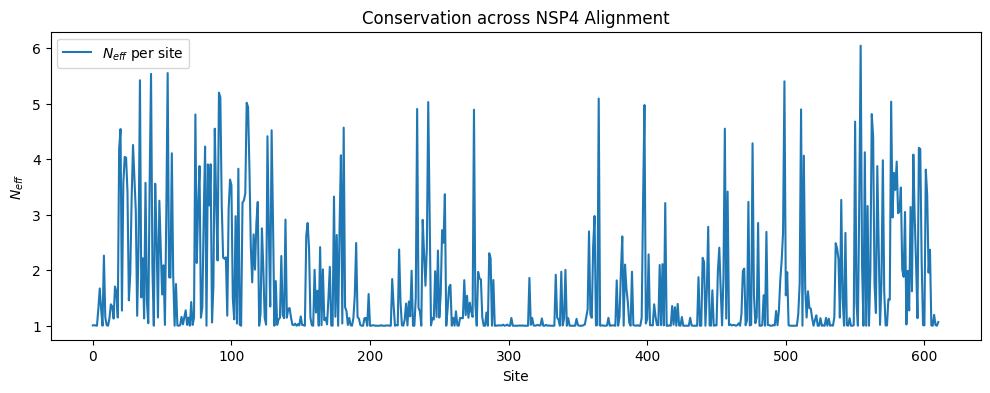

In [17]:
## calculate the entropy and neff
entropies = nsp4_mtx_annot_sites.apply(calculate_entropy).values
neff_values = neff(entropies)


# plot
plt.figure(figsize=(12, 4))
plt.title('Conservation across NSP4 Alignment')
plt.plot(neff_values, label='$N_{eff}$ per site')
plt.xlabel('Site')
plt.ylabel('$N_{eff}$')
plt.legend()
#plt.ylim(0, 20)
#plt.savefig('data/alphavirus/neff_nsp4_alphavirus.png')
plt.show()

In [19]:
def write_neff(infile, outfile, neff_values):
    seq_pdb = str(SeqIO.read(infile, 'fasta').seq)

    amino_acid_mapping = {
        'A':'Ala', 'R':'Arg', 'N':'Asn', 'D':'Asp', 'C':'Cys', 'E':'Glu',
        'Q':'Gln', 'G':'Gly', 'H':'His', 'I':'Ile', 'L':'Leu', 'K':'Lys',
        'M':'Met', 'F':'Phe', 'P':'Pro', 'S':'Ser', 'T':'Thr', 'W':'Trp',
        'Y':'Tyr', 'V':'Val'}


    neffDF = pd.DataFrame({
        'residueName': list(map(amino_acid_mapping.get, list(seq_pdb))),
        'residueAbbrev': list(seq_pdb),
        'residue': range(1, len(neff_values)+1),
        'Neff': neff_values})

    neffDF.to_excel(outfile, index=False)


write_neff('data/nsP4/nsP4_pdb/nsp4-RdRp-SAXS_extended_pdb_seq.fasta', 'results/neff/nsp4_extended_Neff_psiblast_mapped.xlsx', neff_values)
write_neff('data/nsP4/nsP4_pdb/nsp4-RdRp_compact_pdb_seq.fasta', 'results/neff/nsp4_compact_Neff_psiblast_mapped.xlsx', neff_values)


## Visualizing sequence concervation

In [20]:
# those are the 32 ref virus, I will use only them for the plot
# idx_voi = [
#     'QBM15857.1', 'AAD14566.1', 'AAN05101.1', 'AJD20059.2', 'AAD14550.1',
#     'ACT68008.1', 'AAU85259.1', 'ABK32031.1', 'ACO59901.1', 'AHL83800.1',
#     'ABL84688.1', 'AAL79763.1', 'AIM46755.1', 'ABP73665.1', 'AAD14562.1',
#     'AAD14554.1', 'AAC97204.1', 'AAC97206.1', 'AAD14560.1', 'AAD14564.1',
#     'ACV66991.1', 'AAA96329.1', 'CAC87660.1', 'CAA27741.1', 'AAA96972.1',
#     'AAC83378.1', 'AAD14556.1', 'AAK66989.1', 'AAB04682.2', 'AAD14558.1',
#     'ACT75287.1', 'AAF28339.1']


idx_voi = [
    'QBM15857.1', 'AAD14566.1', 'AAN05101.1', 'AJD20059.2', 'AAD14550.1',
    'ACT68008.1', 'AAU85259.1', 'ABK32031.1', 'ACO59901.1', 'AHL83800.1',
    'AAL79763.1', 'AIM46755.1', 'AAD14562.1', 'AAD14554.1', 'AAC97204.1', 
    'AAD14560.1', 'AAD14564.1', 'ACV66991.1', 'AAA96329.1',
    'CAA27741.1', 'AAA96972.1', 'AAC83378.1', 'ACT75287.1', 'AAF28339.1']

nsp4_mtx_annot_sites = nsp4_mtx_annot_sites.loc[idx_voi, :]
nsp4_mtx_annot_sites.shape

(24, 611)

In [21]:
# converting annotation to numerical values with the Neff values
nsp4_mtx_val = nsp4_mtx_annot_sites.copy()
for i, col in enumerate(nsp4_mtx_val.columns):
    nsp4_mtx_val[col] = neff_values[i]

nsp4_mtx_val.shape

(24, 611)

In [22]:
## rename the virus name to a readble format
df = data[[ 'Family', 'Genus', 'Species',
       'Exemplar or additional isolate', 'Virus name(s)',
       'Virus name abbreviation(s)', 'Virus GENBANK accession', 'Virus REFSEQ accession',]]

meta_data = df.merge(pd.read_csv('data/alphavirus_proteins_annotation.txt', sep='\t'), left_on='Virus GENBANK accession', right_on='AccessionNumber')
meta_data['virus_label'] = [x.split(';')[-1] + '-' + str(y) for x, y in  zip(meta_data['Virus name abbreviation(s)'].values, meta_data['Exemplar or additional isolate'].values)]
meta_data

,Family,Genus,Species,Exemplar or additional isolate,Virus name(s),Virus name abbreviation(s),Virus GENBANK accession,Virus REFSEQ accession,AccessionNumber,ProteinID,ProteinName,Organism,Description,Sequence,virus_label
0,Togaviridae,Alphavirus,Aura virus,E,Aura virus,AURAV,AF126284,NC_003900,AF126284,AAD13622.2,polyprotein 1,Aura virus,contains leaky opal termination codon,MEKPTVHVDVDPQSPFVLQLQKSFPQFEIVAQQVTPNDHANARAFS...,AURAV-E
1,Togaviridae,Alphavirus,Aura virus,E,Aura virus,AURAV,AF126284,NC_003900,AF126284,AAD13623.1,polyprotein 2,Aura virus,NaN,MNSVFYNPFGRGAYAQPPIAWRPRRRAAPAPRPSGLTTQIQQLTRA...,AURAV-E
2,Togaviridae,Alphavirus,Barmah Forest virus,E,Barmah Forest virus,BFV,U73745,NC_001786,U73745,AAB40701.1,nonstructural polyprotein,Barmah Forest virus,NaN,MAKPVVKIDVEPESHFAKQVQSCFPQFEIEAVQTTPNDHAHARAFS...,BFV-E
3,Togaviridae,Alphavirus,Barmah Forest virus,E,Barmah Forest virus,BFV,U73745,NC_001786,U73745,AAB40702.1,structural polyprotein,Barmah Forest virus,NaN,MDFIPTQTFYGRRWRPAPVQRYIPQPQPPAPPRRRRGPSQLQQLVA...,BFV-E
4,Togaviridae,Alphavirus,Bebaru virus,E,bebaru virus,BEBV,HM147985,NC_016962,HM147985,AEJ36224.1,non structural polyprotein,Bebaru virus,NaN,MNKVHVDIDEESPFLKSLQRAFPSLEIEAKQVTANDHACARAFSHL...,BEBV-E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Togaviridae,Alphavirus,Western equine encephalitis virus,E,western equine encephalitis virus; western equ...,WEEV; WEEV-SA,GQ287646,NC_075015,GQ287646,ACT75288.1,structural polyprotein,Western equine encephalitis virus,"encodes nucleocapsid, E3, E2, 6K and E1 proteins",MFPYPQLNFPPVYPTNPMAYRDPNPPRRRWRPFRPPLAAQIEDLRR...,WEEV-SA-E
102,Togaviridae,Alphavirus,Western equine encephalitis virus,A,western equine encephalitis virus; western equ...,WEEV; WEEV-NA,AF214040,NC_003908,AF214040,AAF28339.1,nonstructural polyprotein,Western equine encephalitis virus,"encodes nsP1, nsP2, nsP3 and nsP4 proteins",MERIHVDLDADSPYVKSLQRTFPQFEIEARQVTDNDHANARAFSHV...,WEEV-NA-A
103,Togaviridae,Alphavirus,Western equine encephalitis virus,A,western equine encephalitis virus; western equ...,WEEV; WEEV-NA,AF214040,NC_003908,AF214040,AAF28340.1,structural polyprotein,Western equine encephalitis virus,"encodes nucleocapsid, E3, E2, 6K and E1 proteins",MFPYPQLNFPPVYPTNPMAYRDPNPPRRRWRPFRPPLAAQIEDLRR...,WEEV-NA-A
104,Togaviridae,Alphavirus,Whataroa virus,E,Whataroa virus,WHATV,HM147993,NC_016961,HM147993,AEJ36238.1,non structural polyprotein,Whataroa virus,NaN,MEKPVVNVDVDPQSPFVAQLQKSFPQFEVVAQQATPNDHANARAFS...,WHATV-E


In [ ]:
#meta_data.to_excel('data/Alphavirus_ref_data.xlsx', index=False)

In [23]:
# retrieve virus names from meta meta_data, and sorting them in the same order as they appear in the matrix
df = meta_data[meta_data['ProteinID'].isin(list(nsp4_mtx_annot_sites.index.values))][['ProteinID','virus_label', 'Species']]

# Convert the column to a categorical type with the specified order
df['ProteinID'] = pd.Categorical(df['ProteinID'], categories=list(nsp4_mtx_annot_sites.index.values), ordered=True)
df = df.sort_values('ProteinID')

y_labels = list(df['virus_label'].values)
y_labels = [x.split(';')[-1].strip() for x in y_labels]
y_label_idx = [x+0.5 for x in range(len(y_labels))]

In [24]:
pal = sns.color_palette("mako_r",  21)
custom_palette = sns.color_palette(["white"] + pal)
custom_palette

[(1.0, 1.0, 1.0),
 (0.78462009, 0.92466151, 0.82514119),
 (0.68051833, 0.88963189, 0.75150483),
 (0.56798832, 0.85987893, 0.70468261),
 (0.4285828, 0.82635051, 0.6780564),
 (0.3206671, 0.78233575, 0.67786729),
 (0.26604085, 0.73564353, 0.67914062),
 (0.22901625, 0.6834332, 0.67659251),
 (0.20968223, 0.63088252, 0.6701105),
 (0.20384884, 0.58264293, 0.6612145),
 (0.20418396, 0.53013715, 0.64946117),
 (0.20722876, 0.47763224, 0.63711608),
 (0.21112526, 0.42903064, 0.6266318),
 (0.22152555, 0.37424409, 0.61304472),
 (0.23807973, 0.32226344, 0.58941872),
 (0.25296722, 0.2685428, 0.53503572),
 (0.25007383, 0.22365053, 0.45519562),
 (0.2350092, 0.18704459, 0.3781528),
 (0.20976258, 0.14925954, 0.29687795),
 (0.17566717, 0.11378321, 0.21857219),
 (0.13701138, 0.08259683, 0.15060265),
 (0.09009161, 0.04664706, 0.08105568)]

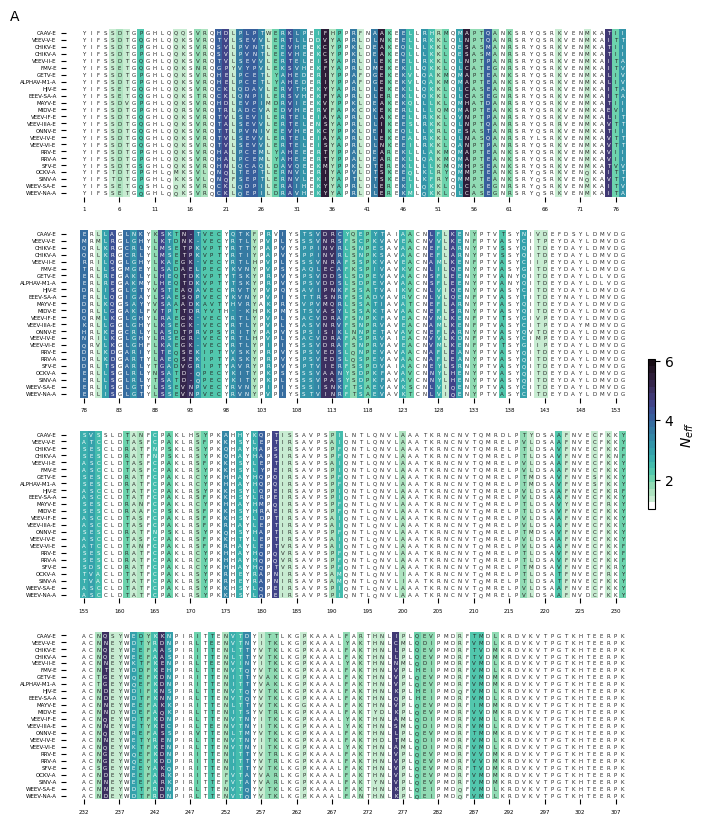

In [26]:
# Version 3
num_rows = 4
#fig, ax = plt.subplots(num_rows, 1, sharex=False, sharey=True, figsize=(7.5, 20), constrained_layout=True)
fig, ax = plt.subplots(num_rows, 1, sharex=False, sharey=True, figsize=(7.5, 10))

min_val = np.min(nsp4_mtx_val.values)
max_val = np.max(nsp4_mtx_val.values)

# rename columns of the alignemt to avoid inconsistence on the plot sizes, due the gap removed.
nsp4_mtx_annot_sites.columns = list(range(1, 612))
nsp4_mtx_val.columns = list(range(1, 612))


###############  subplots ##############
step = 77 
start = 1
stop = 308

for i in range(0, num_rows):
    st = start
    sp = start + (step-1)
    start = sp + 1
    if st < stop:
        sns.heatmap(
            nsp4_mtx_val.loc[:, st:sp], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:, st:sp], fmt='', 
            annot_kws={'size':4}, cbar=False, ax=ax[i], vmin=min_val, vmax=max_val)
        
        labels = nsp4_mtx_annot_sites.loc[:,st:sp].columns
        locations = np.arange(0, len(labels)) + 0.5

        ax[i].set_xticks(locations[::5], labels[::5], size=4, rotation=0)
        ax[i].set_yticks(y_label_idx, y_labels, size=4, rotation=0)
        ax[i].set_xlim(-2, 80)
 
##Figure text elements
cbar_ax = fig.add_axes([0.9, 0.4, 0.01, 0.15]) #(from leeft, from bottom, width, height)
fig.colorbar(ax[0].collections[0], cax=cbar_ax, location="right", shrink=0.005, fraction=0.05, label='$N_{eff}$')

# Add label 'A' on the top left of the figure
fig.text(0.05, 0.9, 'A', ha='left', va='top', fontsize=10)

plt.savefig('results/neff/heatmaps_alphavirus_neff_A_v02.png', dpi=400, bbox_inches='tight')
plt.show()

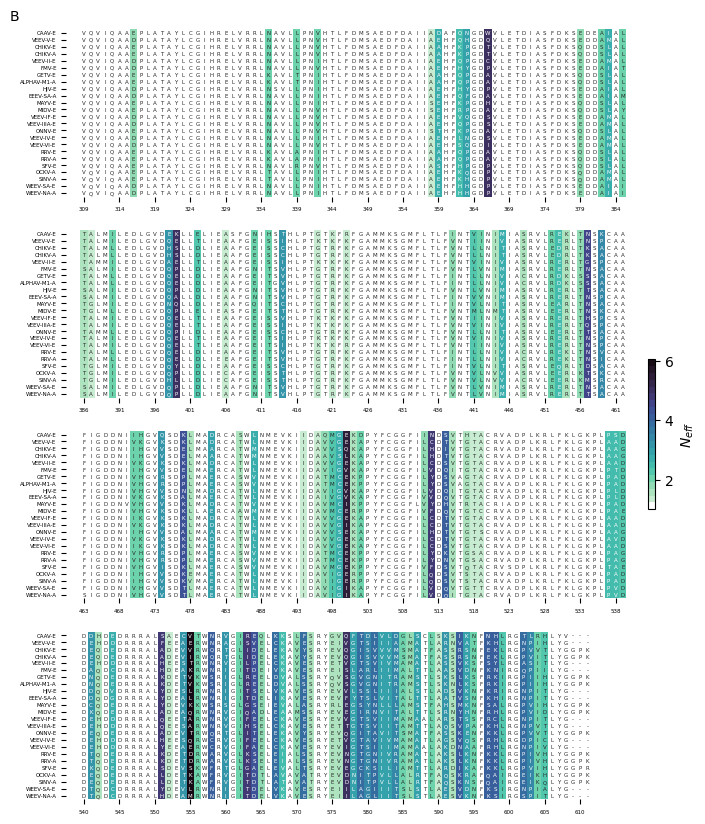

In [27]:
# Version 3
num_rows = 4
#fig, ax = plt.subplots(num_rows, 1, sharex=False, sharey=True, figsize=(7.5, 20), constrained_layout=True)
fig, ax = plt.subplots(num_rows, 1, sharex=False, sharey=True, figsize=(7.5, 10))

min_val = np.min(nsp4_mtx_val.values)
max_val = np.max(nsp4_mtx_val.values)

# rename columns of the alignemt to avoid inconsistence on the plot sizes, due the gap removed.
nsp4_mtx_annot_sites.columns = list(range(1, 612))
nsp4_mtx_val.columns = list(range(1, 612))


###############  subplots ##############
step = 77 
start = 309
stop = 611

for i in range(0, num_rows):
    st = start
    sp = start + (step-1)
    start = sp + 1
    if st < stop:
        sns.heatmap(
            nsp4_mtx_val.loc[:, st:sp], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:, st:sp], fmt='', 
            annot_kws={'size':4}, cbar=False, ax=ax[i], vmin=min_val, vmax=max_val)
        
        labels = nsp4_mtx_annot_sites.loc[:,st:sp].columns
        locations = np.arange(0, len(labels)) + 0.5

        ax[i].set_xticks(locations[::5], labels[::5], size=4, rotation=0)
        ax[i].set_yticks(y_label_idx, y_labels, size=4, rotation=0)
        ax[i].set_xlim(-2, 80)
 
##Figure text elements
cbar_ax = fig.add_axes([0.9, 0.4, 0.01, 0.15]) #(from leeft, from bottom, width, height)
fig.colorbar(ax[0].collections[0], cax=cbar_ax, location="right", shrink=0.005, fraction=0.05, label='$N_{eff}$')

# Add label 'A' on the top left of the figure
fig.text(0.05, 0.9, 'B', ha='left', va='top', fontsize=10)

plt.savefig('results/neff/heatmaps_alphavirus_neff_B_v02.png', dpi=400, bbox_inches='tight')
plt.show()

## N-terminal region

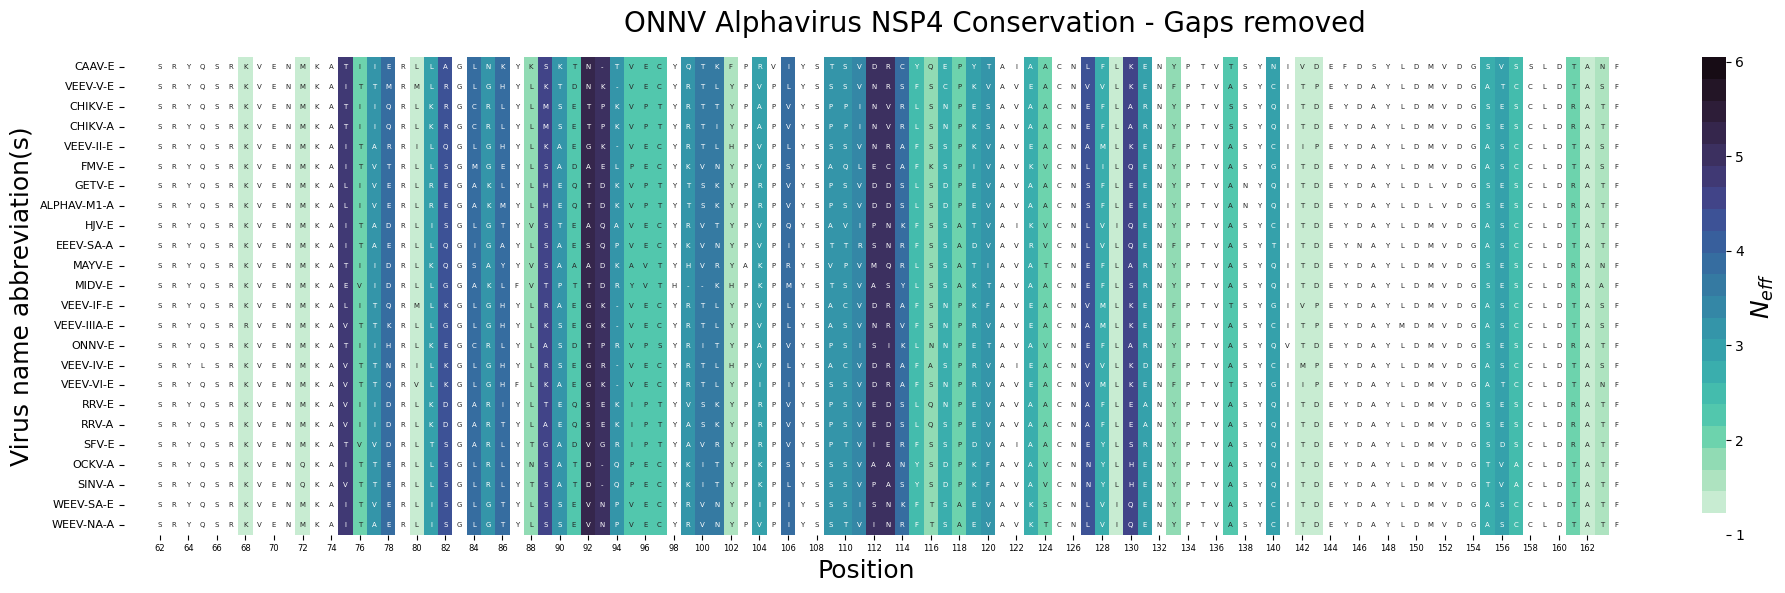

In [30]:
plt.figure(figsize=(20, 6))

start = 62
stop = 164

###############  subplot 1 ##############
fig = sns.heatmap(
    nsp4_mtx_val.loc[:, start:stop], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:, start:stop], fmt='',  
    annot_kws={'size':5}, cbar=True, vmin=min_val, vmax=max_val)

locations, _ = plt.xticks()
labels = nsp4_mtx_annot_sites.loc[:,start:stop].columns[::2]
#print(locations, labels)
plt.xticks(locations, labels, size=6, rotation=0)
plt.yticks(y_label_idx, y_labels, size=8, rotation=0)
plt.xlim(-2, 102)
plt.ylabel('Virus name abbreviation(s)', size=16, ha='center')


# Figure text elements
plt.suptitle('ONNV Alphavirus NSP4 Conservation - Gaps removed', size=20)
cbar = fig.collections[0].colorbar
cbar.set_label('$N_{eff}$', size=18)
plt.ylabel('Virus name abbreviation(s)', size=18, ha='center', rotation=90)
plt.xlabel('Position', size=18, ha='center', rotation=0)

plt.savefig('results/neff//heatmaps_ONNV_alphavirus_extended_neff_hing_v02.png', dpi=600)
plt.tight_layout()
plt.show()

In [ ]:
# # Version 2
# num_rows = 8
# #fig, ax = plt.subplots(num_rows, 1, sharex=False, sharey=True, figsize=(7.5, 20), constrained_layout=True)
# fig, ax = plt.subplots(num_rows, 1, sharex=False, sharey=True, figsize=(7.5, 20))

# min_val = np.min(nsp4_mtx_val.values)
# max_val = np.max(nsp4_mtx_val.values)

# # rename columns of the alignemt to avoid inconsistence on the plot sizes, due the gap removed.
# nsp4_mtx_annot_sites.columns = list(range(1, 612))
# nsp4_mtx_val.columns = list(range(1, 612))


# ###############  subplots ##############
# step = 77 
# start = 1
# stop = 611

# for i in range(0, num_rows):
#     st = start
#     sp = start + (step-1)
#     start = sp + 1
    
#     sns.heatmap(
#         nsp4_mtx_val.loc[:, st:sp], cmap=custom_palette, annot=nsp4_mtx_annot_sites.loc[:, st:sp], fmt='', 
#         annot_kws={'size':4}, cbar=False, ax=ax[i], vmin=min_val, vmax=max_val)
    
#     labels = nsp4_mtx_annot_sites.loc[:,st:sp].columns
#     locations = np.arange(0, len(labels)) + 0.5
 
#     ax[i].set_xticks(locations[::5], labels[::5], size=4, rotation=0)
#     ax[i].set_yticks(y_label_idx, y_labels, size=4, rotation=0)
#     ax[i].set_xlim(-2, 82)
#     #ax[i].tick_params(axis='y', labelsize=4, labelrotation=0)


# ##Figure text elements
# cbar_ax = fig.add_axes([0.9, 0.3, 0.01, 0.5]) #(from leeft, from bottom, width, height)
# #cbar_ax = fig.add_axes([1, 0.3, 0.01, 0.5]) #(from leeft, from bottom, width, height)
# fig.colorbar(ax[0].collections[0], cax=cbar_ax, location="right", shrink=0.03, label='$N_{eff}$')
# # plt.subplots_adjust(wspace=0.5, hspace=0.3)


# #plt.savefig('results/nsP4/heatmaps_alphavirus_neff_v04.png', dpi=400, bbox_inches='tight')
# plt.show()